<a href="https://colab.research.google.com/github/hodanourian/Forecasting-and-Predictive-Analytics/blob/main/Asseinment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Shapiro-Wilk Normality Test and Pearson's Correlation Coefficient Test**

In [ ]:
!pip install astsadata

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 473.8/473.8 kB 23.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

from astsadata import *


/usr/local/lib/python3.12/dist-packages/astsadata/astsadata.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  birth = pd.read_csv(f"{path}/data/birth.csv", index_col=0, parse_dates=True)
/usr/local/lib/python3.12/dist-packages/astsadata/astsadata.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cardox = pd.read_csv(f"{path}/data/cardox.csv", index_col=0, parse_dates=True)
/usr/local/lib/python3.12/dist-packages/astsadata/astsadata.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chicken = pd.read_csv(f"{path}/data/chicken.csv", index_col=0, parse_dates=True)
/usr

In [ ]:
#Measured weekly from the year 2000 to mid-2010.
#Prices are recorded in dollars per barrel ($/barrel)
#Crude Oil, West Texas Intermediate (WTI) Spot Price, Free On Board (FOB)
#545 observations
#The oil series pairs directly with the gas series in the astsa package. The two series are frequently used together for bivariate time series analysis
#Data was obtained from the U.S. Energy Information Administration (EIA)

oil.info()
print('\n', oil.head())

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 545 entries, 1999-12-27/2000-01-02 to 2010-06-14/2010-06-20
Freq: W-SUN
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   545 non-null    float64
dtypes: float64(1)
memory usage: 8.5 KB

                        value
index                       
1999-12-27/2000-01-02  26.20
2000-01-03/2000-01-09  26.07
2000-01-10/2000-01-16  26.34
2000-01-17/2000-01-23  24.95
2000-01-24/2000-01-30  26.27


In [ ]:
#Measured weekly from the year 2000 to mid-2010.
#Prices are recorded in Cents per gallon
#This time series represents the New York Harbor conventional regular gasoline weekly spot price FOB (Free On Board).
#545 observations(the same length as oil)
#Data was obtained from the U.S. Energy Information Administration (EIA)

gas.info()
print('\n', gas.head())

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 545 entries, 1999-12-27/2000-01-02 to 2010-06-14/2010-06-20
Freq: W-SUN
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   545 non-null    float64
dtypes: float64(1)
memory usage: 8.5 KB

                         value
index                        
1999-12-27/2000-01-02  70.636
2000-01-03/2000-01-09  71.040
2000-01-10/2000-01-16  68.490
2000-01-17/2000-01-23  65.137
2000-01-24/2000-01-30  67.918


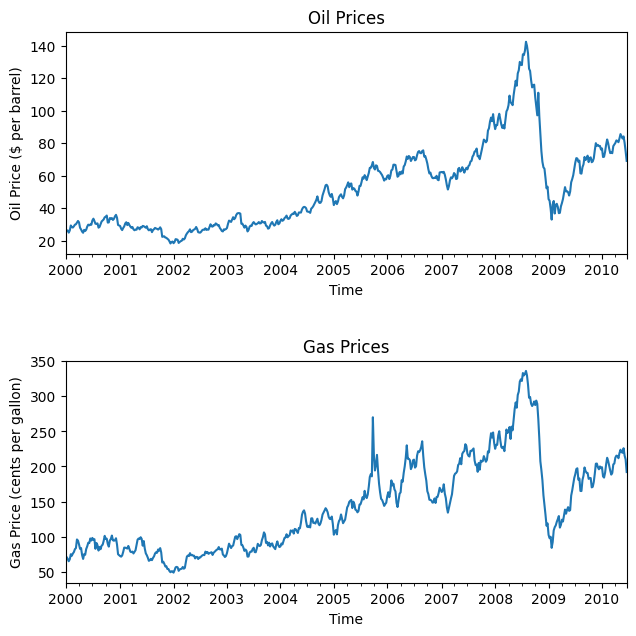

In [ ]:
# Time series plots

fig,axes = plt.subplots(nrows=2,figsize=(7,7))
oil.plot(ax=axes[0], xlabel='Time', ylabel='Oil Price ($ per barrel)', title='Oil Prices', legend=False)
gas.plot(ax=axes[1], xlabel='Time', ylabel='Gas Price (cents per gallon)', title='Gas Prices', legend=False)
plt.tight_layout(pad=3)
plt.show()


# **3.Pairwise Plot**

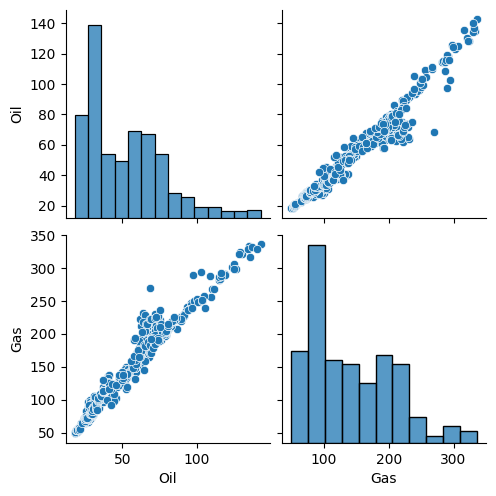

In [ ]:
# Plot pairwiserelationships for multiple datasets, creating scatterplots for pairs of datasets in off-diagonal
# positions and histograms for each dataset along the diagonal

df = pd.DataFrame({'Oil': oil.value,'Gas': gas.value})

# Create a pairplot
sns.pairplot(df)

# Show plot
plt.show()



### **our observations**

▶ The distributions of the two datasets are quite similar.They are not normal and appear to follow a more logarithmic pattern.

▶ A closer look at the histograms shows that the second bin is much larger than the others, while the first bin is roughly similar to the bins following the second one. The logarithmic distribution does not fully capture this pattern. It could be interpreted as a normal distribution whose left tail extends into the negative region, and that part has been removed,Because we don’t have negative prices.Overall, however, the distribution seems to be non-normal.


▶ From the scatter plots, it seems that a line with a positive slope can be fitted to the data, indicating a fairly good linear relationship between gas and oil prices.


















# **4. Shapiro-Wilk Normality Test**

In [ ]:
# for oil dataset

sw_stat, p_value = stats.shapiro(oil.value)

print(f'Shapiro-Wilk test statistic: {sw_stat:.3f}, p-value: {p_value:.3f}\n')

# Interpret the result
alpha = 0.05
if p_value >= alpha:
    print(f'Sample appears to be normally distributed (fail to reject "H0: Data is normal" at a {100*alpha:.0f}% significance level).')
else:
    print(f'Sample does not appear to be normally distributed (reject "H0: Data is normal" at a {100*alpha:.0f}% significance level).')


Shapiro-Wilk test statistic: 0.899, p-value: 0.000

Sample does not appear to be normally distributed (reject "H0: Data is normal" at a 5% significance level).


In [ ]:
# for gas dataset

sw_stat, p_value = stats.shapiro(gas.value)

print(f'Shapiro-Wilk test statistic: {sw_stat:.3f}, p-value: {p_value:.3f}\n')

# Interpret the result
alpha = 0.05
if p_value >= alpha:
    print(f'Sample appears to be normally distributed (fail to reject "H0: Data is normal" at a {100*alpha:.0f}% significance level).')
else:
    print(f'Sample does not appear to be normally distributed (reject "H0: Data is normal" at a {100*alpha:.0f}% significance level).')


Shapiro-Wilk test statistic: 0.925, p-value: 0.000

Sample does not appear to be normally distributed (reject "H0: Data is normal" at a 5% significance level).


# **5. Pearson's Correlation Coefficient Test**

In [ ]:

from IPython.display import display, HTML

#Pearson Test
rho, p_value = stats.pearsonr(oil.value, gas.value)

# Print the correlation coefficient with colored values
display(HTML(f"""
<p>correlation coefficient = <span style="color:#1a73e8;">{rho:.3f}</span>,
p_value = {p_value:.3f}</span></p>"""))


# Interpret the result
alpha = 0.05
if p_value >= alpha:
    print(f'The two samples show no correlation (fail to reject "H0: rho=0" at a {100*alpha:.0f}% significance level).')
else:
    print(f'The two samples exhibit correlation (reject "H0: rho=0" at a {100*alpha:.0f}% significance level).')


The two samples exhibit correlation (reject "H0: rho=0" at a 5% significance level).
